In [1]:
!pip install xgboost==0.90

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def quad_func (x):
    return 5*x**2 - 23*x

In [4]:
quad_func(25)

2550

In [5]:
quad_func(1.254)

-20.979419999999998

In [6]:
np.random.seed(5)
x = pd.Series(np.arange(-20,21,0.2))
#adding random noise
y=x.map(quad_func) + np.random.randn(len(x)) * 30
df = pd.DataFrame({'x':x, 'y':y})

In [7]:
df.head()

,x,y
0,-20.0,2473.236825
1,-19.8,2405.673895
2,-19.6,2444.523136
3,-19.4,2320.437236
4,-19.2,2288.088295


In [8]:
df.corr()

,x,y
x,1.000000,-0.339751
y,-0.339751,1.000000


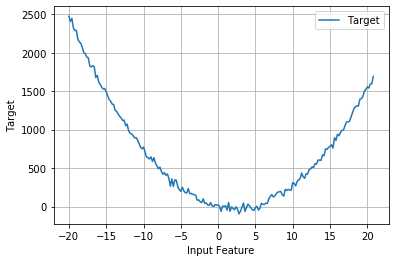

In [10]:
plt.plot(df.x, df.y, label = 'Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [12]:
#Randomise dataset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [13]:
rows = df.shape[0]
train = int(.7*rows)
test = rows - train

In [14]:
rows, train, test

(205, 143, 62)

In [15]:
#write training set
df[:train].to_csv('quadratic_train.csv', index = False, header = False, columns = ['y', 'x'])

In [16]:
df[train:].to_csv('quadratic_validation.csv', index = False, header = False, columns = ['y', 'x'])

In [17]:
import sys
from sklearn.metrics import mean_squared_error, mean_absolute_error

import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [19]:
train_file = 'quadratic_train.csv'
validation_file = 'quadratic_validation.csv'
df_train = pd.read_csv(train_file, names=['y','x'])
df_validation = pd.read_csv(validation_file, names=['y','x'])

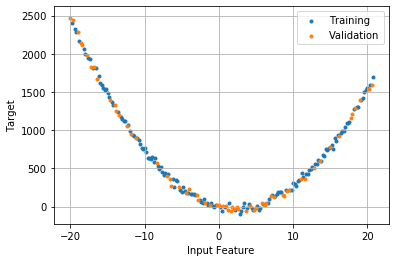

In [21]:
plt.scatter(df_train.x, df_train.y, label = 'Training', marker = '.')
plt.scatter(df_validation.x, df_validation.y, label = 'Validation', marker = '.')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [29]:
x_train = df_train.iloc[:,1:] #1st column onwards
y_train = df_train.iloc[:,0].ravel() #0th cokumn
x_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [30]:
regressor = xgb.XGBRegressor()
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [32]:
regressor.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_validation, y_validation)])

[22:30:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:852.082	validation_1-rmse:931.882
[1]	validation_0-rmse:776.32	validation_1-rmse:853.857
[2]	validation_0-rmse:707.455	validation_1-rmse:779.725
[3]	validation_0-rmse:644.955	validation_1-rmse:711.567
[4]	validation_0-rmse:587.747	validation_1-rmse:652.779
[5]	validation_0-rmse:536.019	validation_1-rmse:595.832
[6]	validation_0-rmse:490.469	validation_1-rmse:545.727
[7]	validation_0-rmse:447.317	validation_1-rmse:499.978
[8]	validation_0-rmse:410.19	validation_1-rmse:460.088
[9]	validation_0-rmse:374.376	validation_1-rmse:421.358
[10]	validation_0-rmse:342.484	validation_1-rmse:387.917
[11]	validation_0-rmse:313.615	validation_1-rmse:357.32
[12]	validation_0-rmse:286.623	validation_1-rmse:328.889
[13]	validation_0-rmse:263.527	validation_1-rmse:303.867
[14]	validation_0-rmse:241.564	validation_1-rmse:28

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [34]:
eval_result=regressor.evals_result()
training_rounds=range(len(eval_result['validation_0']['rmse']))

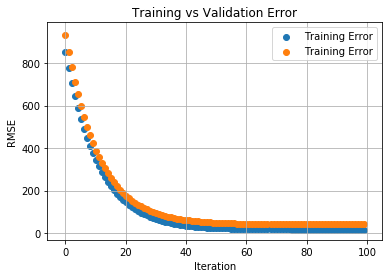

In [36]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'], label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'], label='Training Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training vs Validation Error')
plt.legend()
plt.show()

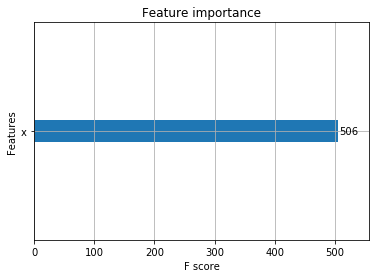

In [37]:
xgb.plot_importance(regressor)
plt.show()

In [39]:
#Validation dataset compare actual vs predicted
result=regressor.predict(x_validation)

In [41]:
result[:]

array([ 1.81655420e+03,  3.56903648e+01,  1.81655420e+03,  1.40322083e+03,
        1.52610794e+02,  1.17404810e+03,  2.01167542e+02,  4.92560844e+01,
        2.93058300e+01, -1.29943752e+01,  4.22589630e+02,  1.94137781e+03,
       -3.08399067e+01,  1.60824871e+00,  8.57939303e-01,  1.44216553e+02,
        1.27090527e+03,  1.69794019e+03,  2.20426697e+02,  6.02036743e+02,
        1.07166992e+03,  3.55855774e+02,  2.39465503e+03,  1.23666638e+03,
        1.67910132e+03, -2.62343907e+00,  5.57078796e+02, -3.08399067e+01,
        4.00922012e+01,  2.39465503e+03,  5.39721497e+02,  2.17041626e+03,
        1.59084705e+03, -2.62343907e+00,  2.93058300e+01,  9.42563782e+02,
        1.60824871e+00,  1.44216553e+02, -1.16987591e+01,  2.20426697e+02,
       -1.29943752e+01,  8.71147385e+01,  1.33060583e+03,  7.89814148e+02,
        4.22589630e+02,  8.96187073e+02,  1.36601062e+03,  1.69919449e+02,
        9.69345825e+02, -4.28549423e+01,  1.98772736e+02,  2.17041626e+03,
        4.24224396e+02, -

In [42]:
result[:5]

array([1816.5542  ,   35.690365, 1816.5542  , 1403.2208  ,  152.6108  ],
      dtype=float32)

<function matplotlib.pyplot.show(*args, **kw)>

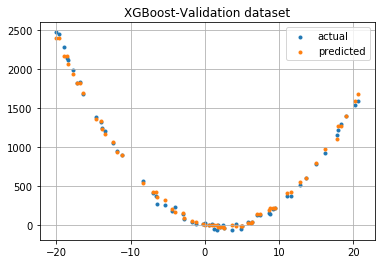

In [43]:
plt.title('XGBoost-Validation dataset')
plt.scatter(df_validation.x,df_validation.y,label ='actual', marker ='.')
plt.scatter(df_validation.x,result,label ='predicted', marker ='.')
plt.grid(True)
plt.legend()
plt.show

In [44]:
#RMSE metric
print('XGBoost Algo Metrics')
mse = mean_squared_error(df_validation.y, result)
print("Mean Squared Error: {0:.2f}".format(mse))
print("Root Mean Square Error: {0:.2f}".format(mse**.5))

XGBoost Algo Metrics
Mean Squared Error: 1679.40
Root Mean Square Error: 40.98


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

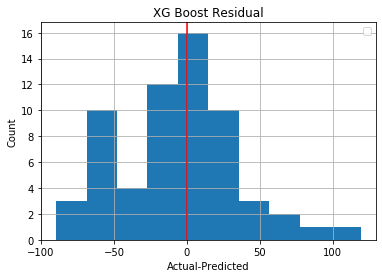

In [46]:
#Residual
#Training data residual
residuals = df_validation.y - result
plt.hist(residuals)
plt.grid(True)
plt.legend()
plt.xlabel('Actual-Predicted')
plt.ylabel('Count')
plt.title('XG Boost Residual')
plt.axvline(color = 'r')
plt.show

In [47]:
#Count values greater than zero an dless than zero
value_counts = (residuals>0).value_counts(sort = False)
print('Under Estimation: {0}'.format(value_counts[True]))
print('Over Estimation: {0}'.format(value_counts[False]))

Under Estimation: 29
Over Estimation: 33


<function matplotlib.pyplot.show(*args, **kw)>

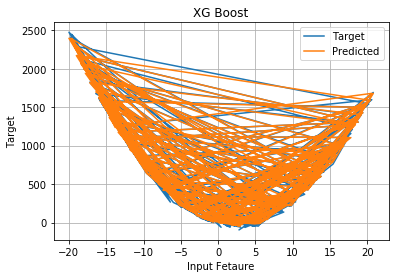

In [49]:
#plot for entire datasset
plt.plot(df.x, df.y, label = 'Target')
plt.plot(df.x, regressor.predict(df[['x']]), label = 'Predicted')
plt.grid(True)
plt.legend()
plt.xlabel('Input Fetaure')
plt.ylabel('Target')
plt.title('XG Boost')
plt.show